In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv("../immouscout/data/immo_data.csv")
berlin = d.query("regio1 == 'Berlin'")
d.shape

(132514, 48)

In [5]:
berlin.shape

(5008, 48)

In [6]:
berlin.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,electricityBasePrice,picturecount,pricetrend,...,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,date
26,Berlin,130.00,combined_heat_and_power_plant,ONE_YEAR_FREE,NaN,True,True,90.76,8,8.70,...,False,1,Berlin,Adlershof_Treptow,Das Mehrfamilienhaus in der Wassermannstraße 7...,"Dieses schöne 1,5-Zimmerapartment mit stilvoll...",NaN,A,NaN,Sep18
114,Berlin,145.00,central_heating,ONE_YEAR_FREE,NaN,False,False,90.76,5,7.69,...,False,4,Berlin,Marzahn_Marzahn,NaN,"Ausstattung:\nZentralheizung, Keller, Badewann...",110.00,NaN,2001.0,Sep18
134,Berlin,170.00,central_heating,ONE_YEAR_FREE,10.0,False,True,90.76,17,8.74,...,False,6,Berlin,Charlottenburg_Charlottenburg,Allgemein:\n- Saniertes Treppenhaus\n- Wärmedä...,"Allgemein:\n- Kabel-TV, Grundversorgung\n- Was...",150.00,D,NaN,Sep18
138,Berlin,195.00,central_heating,ONE_YEAR_FREE,NaN,False,True,NaN,33,6.85,...,True,6,Berlin,Frohnau_Reinickendorf,Schöne 4-Zimmerwohnung mit anteiliger Gartenbe...,- Einbauküche (gebraucht) modernisiert mit neu...,140.00,C,2019.0,May19
152,Berlin,448.48,central_heating,ONE_YEAR_FREE,NaN,False,True,90.76,26,9.82,...,False,6,Berlin,Prenzlauer_Berg_Prenzlauer_Berg,Das Haus in der Greifswalder Str. 26/Ecke Käth...,Helle 4 Raum Familienwohnung\n\n4 Räume:\n3 gr...,224.24,NaN,NaN,Sep18


In [7]:
berlin.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony',
       'electricityBasePrice', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'electricityKwhPrice', 'scoutId', 'noParkSpaces', 'firingTypes',
       'hasKitchen', 'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent',
       'houseNumber', 'livingSpace', 'geo_krs', 'condition', 'interiorQual',
       'petsAllowed', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'date'],
      dtype='object')

In [8]:
df = berlin[['newlyConst', 'balcony', 'totalRent', 'yearConstructed', 'livingSpace', 'regio3', 'geo_plz', 'condition']]
df['sqm_rent'] = df['totalRent'] / df['livingSpace']
df.head()

/home/corrie/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,newlyConst,balcony,totalRent,yearConstructed,livingSpace,regio3,geo_plz,condition,sqm_rent
26,True,True,830.00,2017.0,35.00,Adlershof_Treptow,12489,first_time_use,23.714286
114,False,False,764.00,1985.0,99.80,Marzahn_Marzahn,12689,refurbished,7.655311
134,False,True,2490.00,1904.0,146.86,Charlottenburg_Charlottenburg,14059,refurbished,16.954923
138,False,True,1785.00,1985.0,126.34,Frohnau_Reinickendorf,13465,first_time_use_after_refurbishment,14.128542
152,False,True,3139.29,1914.0,149.49,Prenzlauer_Berg_Prenzlauer_Berg,10405,mint_condition,21.000000


In [9]:
data = df[(df.sqm_rent.notnull()) & (df.sqm_rent > 0)].sqm_rent.values

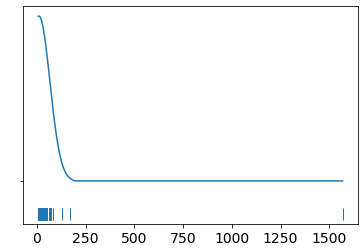

In [10]:
az.plot_kde(data, rug=True)
plt.yticks([0], alpha=0)
plt.show()

In [27]:
with pm.Model() as base_line:
    mu = pm.Normal('mu', mu=10, sd=20)
    sigma = pm.HalfNormal('sigma', sd=20)
    
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    
    trace = pm.sample(4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 9000/9000 [00:05<00:00, 1769.13draws/s]
The acceptance probability does not match the target. It is 0.8821316622512726, but should be close to 0.8. Try to increase the number of tuning steps.


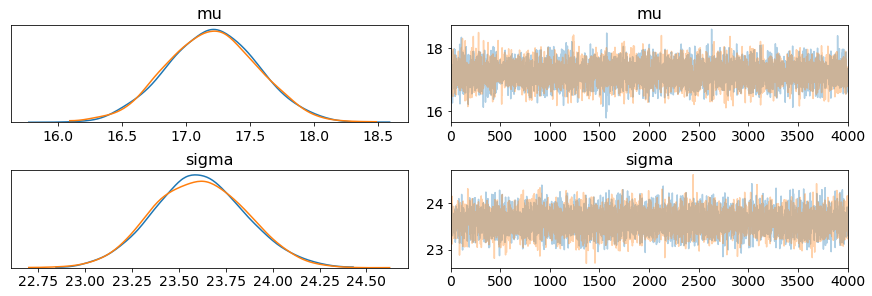

In [28]:
az.plot_trace(trace)
plt.show()

In [29]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,17.202,0.349,16.543,17.847,0.004,0.003,8410.0,8404.0,8405.0,5514.0,1.0
sigma,23.607,0.243,23.174,24.085,0.003,0.002,8966.0,8966.0,8947.0,6238.0,1.0


In [30]:
y_pred = pm.sample_posterior_predictive(trace, 100, base_line)

100%|██████████| 100/100 [00:00<00:00, 720.32it/s]


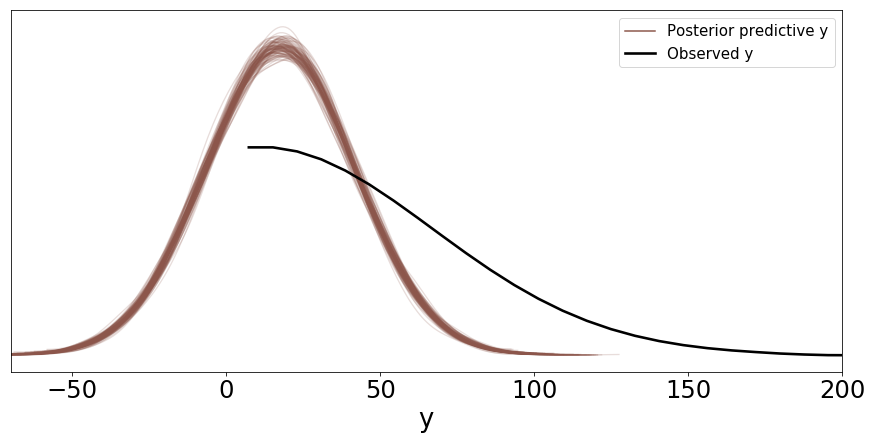

In [31]:
y_ppc = az.from_pymc3(trace=trace, posterior_predictive=y_pred)
ax = az.plot_ppc(y_ppc, figsize=(12, 6), mean=False)
ax[0].legend(fontsize=15)
plt.xlim(-70,200)
plt.show()

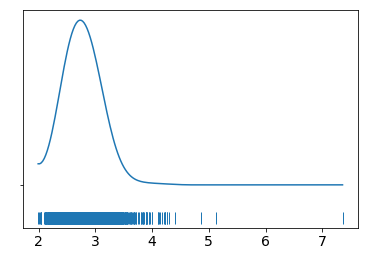

In [32]:
log_data = np.log(data)
az.plot_kde(log_data, rug=True)
plt.yticks([0], alpha=0)
plt.show()

In [42]:
with pm.Model() as log_base_line:
    mu = pm.Normal('mu', mu=0, sd=5)
    sigma = pm.HalfNormal('sigma', sd=10)
    
    y = pm.Normal('y', mu=mu, sd=sigma, observed=log_data)
    
    trace = pm.sample(4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 9000/9000 [00:05<00:00, 1528.41draws/s]
The acceptance probability does not match the target. It is 0.8886651338393831, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9071588025785929, but should be close to 0.8. Try to increase the number of tuning steps.


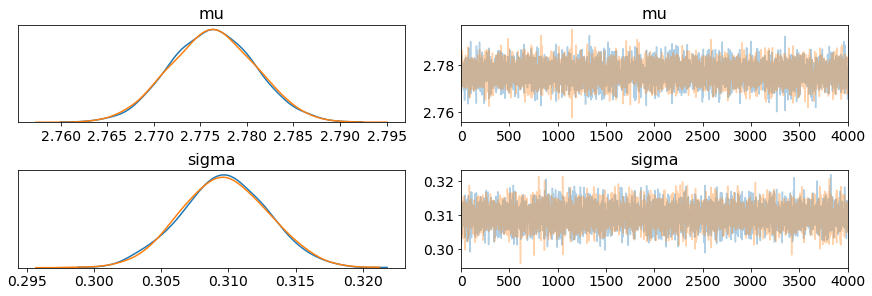

In [43]:
az.plot_trace(trace)
plt.show()

In [44]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,2.776,0.004,2.768,2.785,0.0,0.0,8381.0,8381.0,8363.0,5736.0,1.0
sigma,0.310,0.003,0.304,0.316,0.0,0.0,7994.0,7994.0,8011.0,5654.0,1.0


100%|██████████| 100/100 [00:00<00:00, 606.55it/s]


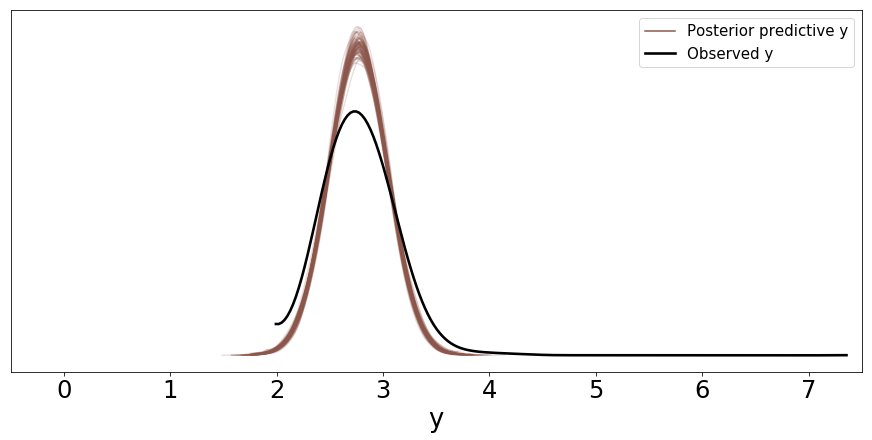

In [53]:
y_pred = pm.sample_posterior_predictive(trace, 100, log_base_line)
y_ppc = az.from_pymc3(trace=trace, posterior_predictive=y_pred)
ax = az.plot_ppc(y_ppc, figsize=(12, 6), mean=False)
ax[0].legend(fontsize=15)
plt.xlim(-0.5,7.5)
plt.show()

In [46]:
with pm.Model() as robust_log_base_line:
    mu = pm.Normal('mu', mu=0, sd=5)
    sigma = pm.HalfNormal('sigma', 10)
    nu = pm.HalfNormal('nu', 10)
    
    y = pm.StudentT('y', nu=nu, mu=mu, sd=sigma, observed=log_data)
    
    trace = pm.sample(4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, mu]
Sampling 2 chains: 100%|██████████| 9000/9000 [00:15<00:00, 598.38draws/s]
The acceptance probability does not match the target. It is 0.8897458374428217, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8805647635518681, but should be close to 0.8. Try to increase the number of tuning steps.


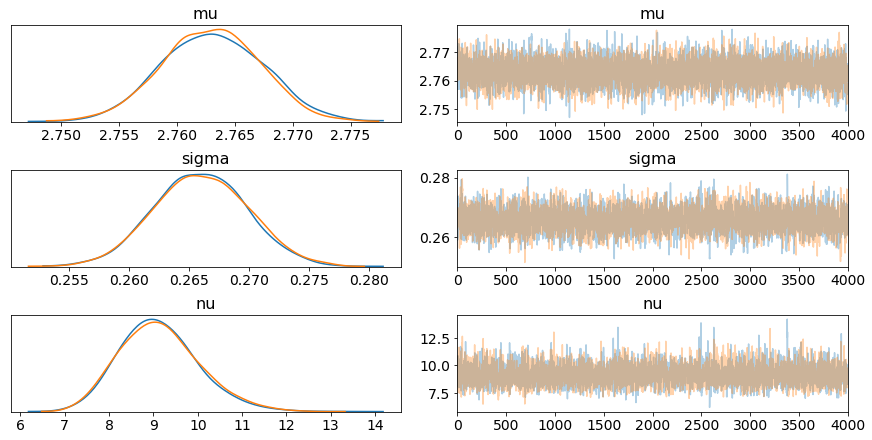

In [47]:
az.plot_trace(trace)
plt.show()

In [48]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,2.763,0.004,2.755,2.771,0.000,0.000,5772.0,5772.0,5786.0,5620.0,1.0
sigma,0.266,0.004,0.259,0.273,0.000,0.000,5009.0,5009.0,5014.0,5293.0,1.0
nu,9.127,0.894,7.578,10.881,0.013,0.009,4954.0,4903.0,5022.0,5043.0,1.0


100%|██████████| 100/100 [00:00<00:00, 632.66it/s]


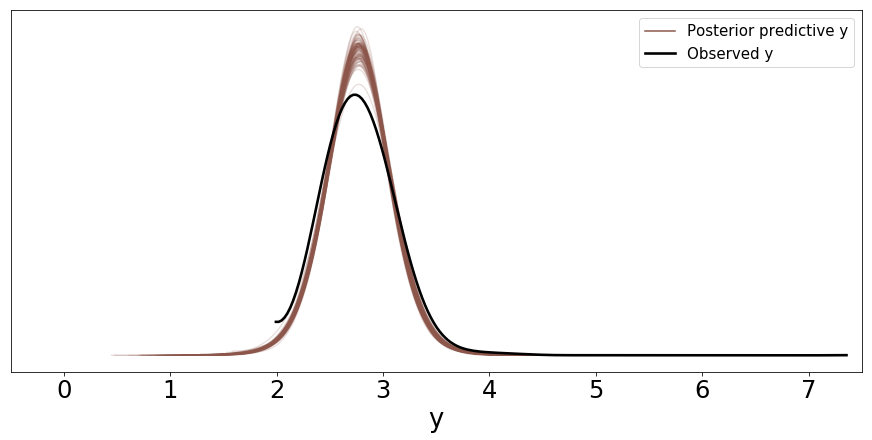

In [52]:
y_pred = pm.sample_posterior_predictive(trace, 100, robust_log_base_line)
y_ppc = az.from_pymc3(trace=trace, posterior_predictive=y_pred)
ax = az.plot_ppc(y_ppc, figsize=(12, 6), mean=False)
ax[0].legend(fontsize=15)
plt.xlim(-0.5, 7.5)
plt.show()